In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df1 = pd.read_csv("cybersecurity_intrusion_data.csv")


In [4]:
display(df1.head())
display(df1.info())
display(df1.isnull().sum())
display(df1.shape)
display(df1.describe().T)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


None

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

(9537, 11)

,count,mean,std,min,25%,50%,75%,max
network_packet_size,9537.0,500.430639,198.379364,64.000000,365.000000,499.000000,635.000000,1285.000000
login_attempts,9537.0,4.032086,1.963012,1.000000,3.000000,4.000000,5.000000,13.000000
session_duration,9537.0,792.745312,786.560144,0.500000,231.953006,556.277457,1105.380602,7190.392213
ip_reputation_score,9537.0,0.331338,0.177175,0.002497,0.191946,0.314778,0.453388,0.924299
failed_logins,9537.0,1.517773,1.033988,0.000000,1.000000,1.000000,2.000000,5.000000
unusual_time_access,9537.0,0.149942,0.357034,0.000000,0.000000,0.000000,0.000000,1.000000
attack_detected,9537.0,0.447101,0.497220,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:

# Reset index and make the old index a column
df = df1.reset_index()

# Display the updated DataFrame
display(df.head())

,index,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [6]:

attack_counts = df.attack_detected.value_counts()
attack_counts

attack_detected
0    5273
1    4264
Name: count, dtype: int64

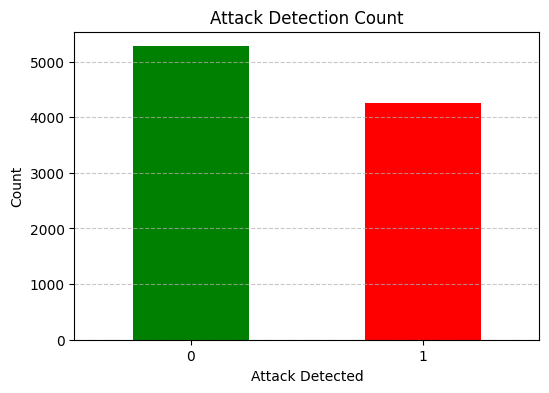

In [7]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
attack_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel("Attack Detected")
plt.ylabel("Count")
plt.title("Attack Detection Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

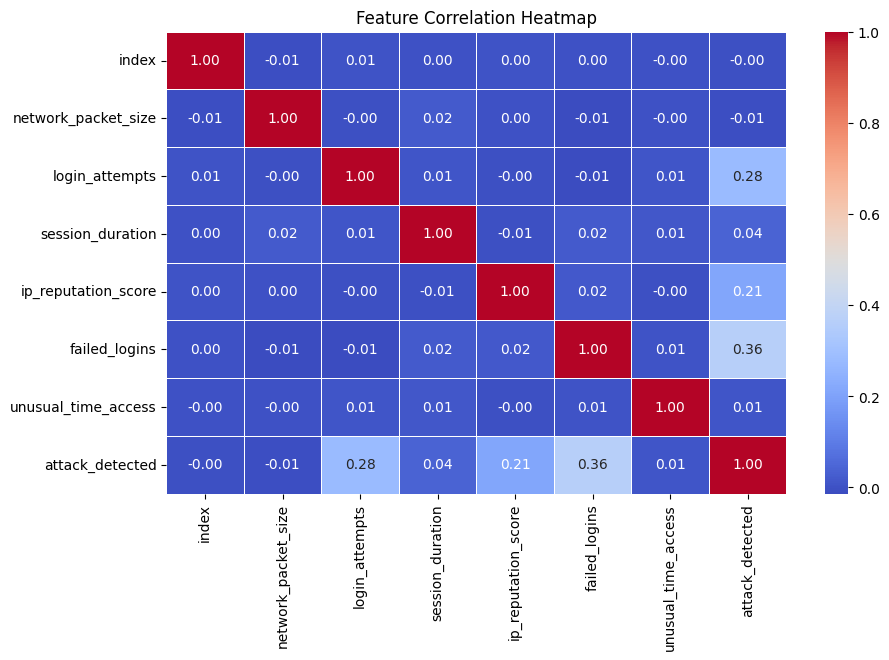

In [8]:
import seaborn as sns

df_numeric = df.select_dtypes(include=np.number) 

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor

# Features and targe
features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

# Define feature types
numerical_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline with XGBRegressor
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Show pipeline summary
print("Pipeline successfully trained!")

Pipeline successfully trained!


In [10]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
from sklearn.metrics import mean_absolute_error

# Predictions from our pipeline
y_pred = pipeline.predict(X_test)

# Baseline model: predict the mean of y_train
baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Compute MAE
mae_pipeline = mean_absolute_error(y_test, y_pred)
mae_baseline = mean_absolute_error(y_test, baseline_pred)

print(f"MAE (XGBRegressor Model): {mae_pipeline:.4f}")
print(f"MAE (Baseline - Mean Prediction): {mae_baseline:.4f}")

MAE (XGBRegressor Model): 0.1845
MAE (Baseline - Mean Prediction): 0.4950


In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7]
}

# GridSearchCV setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model MAE
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"Best Model MAE: {mae_best:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 500}
Best Model MAE: 0.1836


In [13]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions
param_dist = {
    'model__n_estimators': np.arange(100, 600, 100),
    'model__learning_rate': np.linspace(0.005, 0.05, 5),
    'model__max_depth': np.arange(3, 10, 2),
    'model__subsample': np.linspace(0.6, 1.0, 5),
    'model__colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# RandomizedSearchCV setup (n_iter=20 to keep it efficient)
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=20, 
    cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42, verbose=2
)

# Run RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters & MAE
print("Best Parameters:", random_search.best_params_)

# Best model evaluation
best_model_random = random_search.best_estimator_
y_pred_best_random = best_model_random.predict(X_test)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)

print(f"Best Model MAE (RandomizedSearch): {mae_best_random:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'model__subsample': np.float64(1.0), 'model__n_estimators': np.int64(400), 'model__max_depth': np.int64(7), 'model__learning_rate': np.float64(0.01625), 'model__colsample_bytree': np.float64(1.0)}
Best Model MAE (RandomizedSearch): 0.1852


In [14]:
!pip install shap


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


 97%|=================== | 1855/1908 [00:14<00:00]       

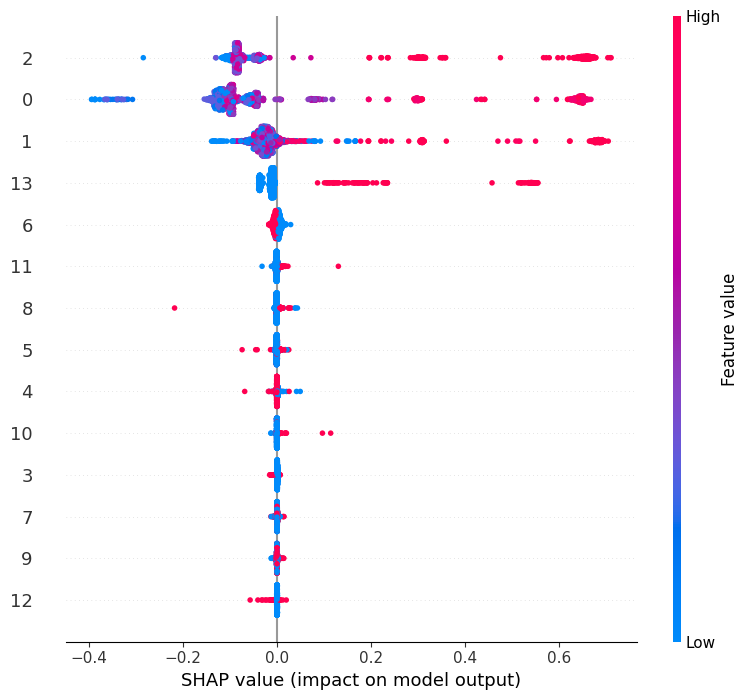

[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=   0.1s


In [15]:
import shap
import matplotlib.pyplot as plt

# Extract the trained XGBoost model from the pipeline
xgb_model = best_model.named_steps["model"]

# Extract preprocessing step from pipeline
preprocessor = best_model.named_steps["preprocessing"]

# Transform X_test using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Convert to DataFrame for SHAP (optional, helps readability)
import pandas as pd
X_test_transformed = pd.DataFrame(X_test_transformed)

# Initialize SHAP explainer with XGB model
explainer = shap.Explainer(xgb_model, X_test_transformed)

# Compute SHAP values
shap_values = explainer(X_test_transformed)

# Summary plot
shap.summary_plot(shap_values, X_test_transformed)